In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../data/airbnb_clean.csv")
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_rate
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,private room,149,1,9,2018-10-19,0.21,6,365,1.000000
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.972603
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,private room,150,3,0,NaN,0.00,1,365,1.000000
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,entire home/apt,89,1,270,2019-07-05,4.64,1,194,0.531507
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.000000


In [35]:
low_limit = df["price"].quantile(0.33)
high_limit = df["price"].quantile(0.66)

def define_price_segment(x):
    if x < low_limit:
        return "Low"
    elif x >= low_limit and x<= high_limit:
        return "Mid"
    else:
        return "High"

df["price_segment"] = df["price"].apply(define_price_segment)
price_sensitivity = (
    df.groupby("price_segment")["availability_rate"].mean().reset_index()
)

price_sensitivity["occupancy_rate"] = 1 - price_sensitivity["availability_rate"]
price_sensitivity = price_sensitivity.rename(columns={"price_segment": "Price Segment", "availability_rate": "Availability Rate", "occupancy_rate": "Occupancy Rate"})
price_sensitivity

,Price Segment,Availability Rate,Occupancy Rate
0,High,0.355797,0.644203
1,Low,0.293340,0.706660
2,Mid,0.275045,0.724955


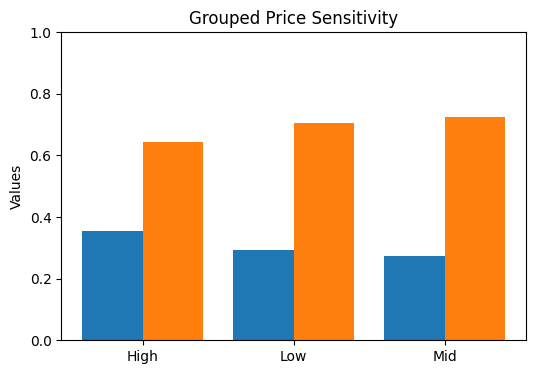

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
x1 = price_sensitivity["Price Segment"]
y1 = price_sensitivity["Availability Rate"]
y2 = price_sensitivity["Occupancy Rate"]


w, x = 0.4, np.arange(len(x1))

ax.bar(x - w/2, y1, width=w)
ax.bar(x + w/2, y2, width=w)

ax.set_xticks(x)
ax.set_xticklabels(x1)
ax.set_ylabel('Values')
ax.set_title('Grouped Price Sensitivity')
ax.set_ylim(0, 1)

plt.show()